### Sampling Distributions and Bootstrapping

#### Introduction

This notebook will serve as the first of hopefully many posts/notebooks aimed at understanding one of many concepts related to fundamental statistics, machine learning, and data science (and potentially data science education).  Although a notebook feels a bit unprofessional, it does an amazing job of allowing me to easily produce ideas in the for text, equations, code, and links all in a single location.  The also keep others from leaving long tags of comments, which is appealing to me!  

My hope is for some of these notebooks to be helpful in understanding fundamental concepts, while others will aim simply to show interesting projects that I am currently working on.  I am a teacher by trade, so all materials will likely have a bit of that flare.  

#### Introduction to Sampling Distributions

Sampling distributions are, in my opinion, one of the most important concepts to understanding many follow up ideas in statistics.  A **sampling distrion is the distribution of a statistic**, which could be any statistic (a mean, a standard deviation, a proportion, a maximum, a minimum, etc).  In introductory statistics, we focus on the sampling distribution associated with specifically the sample mean, $\bar{x}$, which is discussed extremely well in [this video](https://youtu.be/zr-97MVZYb0).

However, the reason for performing confidence intervals and hypothesis tests in the way we do in many fields is due to our fundamental understanding of sampling distributions.  That is, if we know how a statistic fluctuates, we can use this to understand where a parameter value exists.  Using a statistic to draw conclusions about a population parameter is known as inference. 

Let's define a few more items before going further:

* A **parameter** is a numeric summary of a population.

* A **population** is our entire group of interest.

* A **statistic** is a numeric summary of a sample.

* A **sample** is (ideally a representative) subset of our population of interest.

An image is provided below to showcase this situation.

<img src="https://www.cliffsnotes.com/assets/267169.png">

Then a sampling distribution provides us with an idea about how a statistic fluctuates, and we understand many of these sampling distributions (shape, center, and spread) because of mathematical properties based on [asymptotic properties](https://en.wikipedia.org/wiki/Asymptotic_theory_(statistics) of those statistics, which is incredible.

However, it does raise questions as to what sample size assures that asymptotic properties have kicked in?  Introductory statistics books (and some empirical evidence) will suggest that a magic 30 or more will do the trick.  We might try putting this to the trick.

#### Introduction to Bootstrapping

Bootstrapping (or bootstrap sampling) is a sampling technique where we sample with replacement.  Common techniques using bootstrap sampling will sample the size of your original sample.  When we bootstrap sample, we are treating our original sample like a population.  We then are simulating what possible samples could look like, and in turn, what values of a statistic are likely.

Here is what the process might look like in practice:

1. Obtain a representative sample from your population of interest (say 100 individuals for simplicity).

2. Sample with replacement (Bootstrap sample) from your sample of 100 individuals, again 100 times.  Notice, bootstrapping allows for our sample data to look different at each iteration.  If we did not sample replacement, we would simply have identical samples.  

3. With each bootstrap sample, calculate our statistic of interest.  

4. The distribution of the statistics created from our bootstrap samples is now a reasonable estimation of our sampling distribution. 

5. Using our bootstrap sampling distribution, we have a strong understanding of how our statistic of interest will fluctuate from one sample to another.  This provides a nice way to build confidence intervals or calculate p-values, but more on this in another post.


#### Sampling Distribution and Bootstrapping for the Sample Mean

Let's look at sampling distributions and bootstrapping in pracitce:

For this example, we will use a built in dataset in R.

In [1]:
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


Above, we can see a header of our data.  Below, we can see there are 32 rows and 11 columns to our dataset.

In [2]:
dim(mtcars)

[1] 32 11

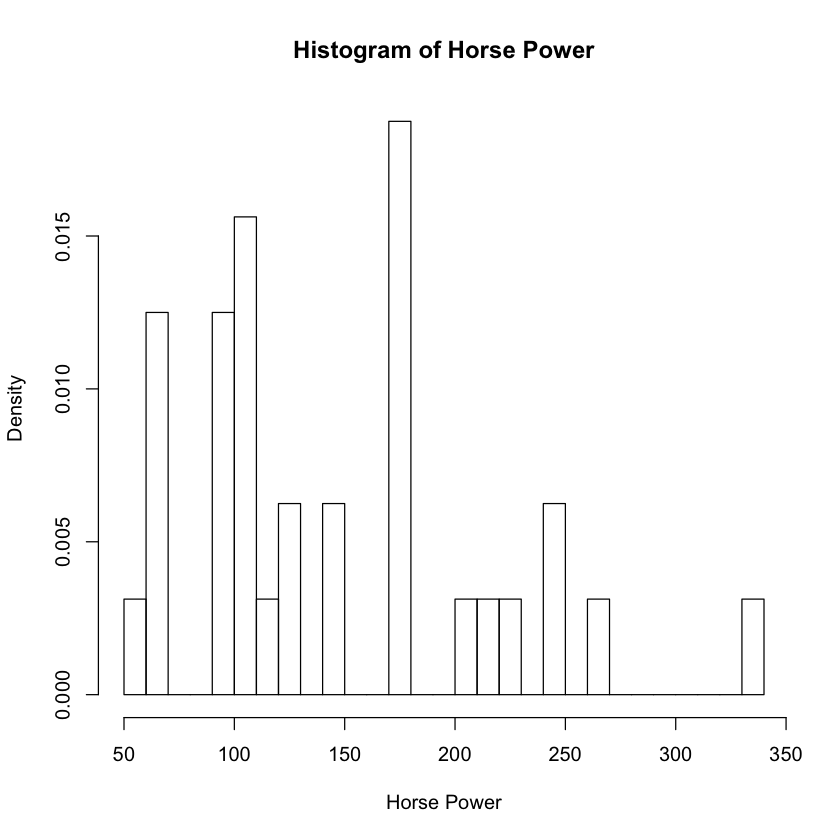

In [3]:
hist(mtcars$hp, breaks = 30, prob = TRUE, main = "Histogram of Horse Power",
     xlab = "Horse Power")

A quick look at horsepower shows a somewhat right-skewed distribution.  

Let's pretend for a moment.  Imagine the above data was the response to medical treatment with 32 individuals, we might ask the question: Is this a large enough sample to conduct t-tests in the usual way?  I want to know the average response to the treatment.  A t-distribution has an underlying assumption that our sample mean follows a normal distribution - is this sample size of 32 large enough for the Central Limit Theorem to have kicked in?  I can see the original data is not normally distributed, so how do we know if our calculations will be correct.  Furthermore, obtaining new isn't exactly in our control.  

Rather than having these distribution assumptions, we can bootstrap our sample to understand the sampling distribution of the sample mean. 

In [4]:
mean_values = NULL
for (idx in 1:10000){
    mean_values[idx] = mean(sample(mtcars$hp, 32, replace = TRUE))
}

Now, `mean_values` is a vector of means produced by bootstrap sampling our horsepower variable.  Plotting the means, shows us what we can expect the sampling distribution of the sample mean to look like in practice. 

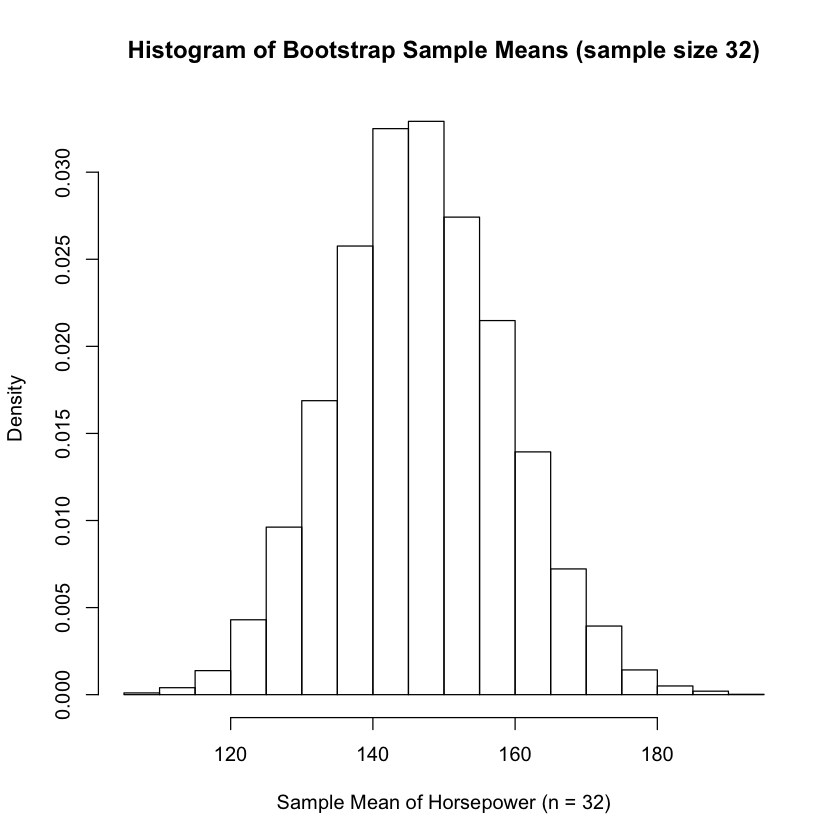

In [5]:
hist(mean_values, breaks = 30, prob = TRUE, 
     main = "Histogram of Bootstrap Sample Means (sample size 32)",
     xlab = "Sample Mean of Horsepower (n = 32)")

We can see, the normal distribution does seem to suggest that the Central Limit Theorem appears to have kicked in with this sample size.  Our means do appear to follow a normal distribution.  Let's take this a step farther by looking at a statistic that isn't a mean.  What if we wanted to understand how correlation coefficients fluctuate.  We could understand the distribution of a correlation coefficient in much the same way as we understand the distribution of the sample mean above without needing a mathematical theorem (like the Central Limit Theorem) to rigorously prove our idea.

Specifically, the above distribution should be centered on the mean of our original data, with a standard deviation of our original data divided by the square root of the sample size.  Let's verify:

In [6]:
mean(mtcars$hp); mean(mean_values);

[1] 146.6875

[1] 146.6968

In [7]:
sd(mtcars$hp)/sqrt(32); sd(mean_values);

[1] 12.12032

[1] 11.96148

#### Sampling Distribution and Bootstrapping for a Correlation Coefficient

That's great that we verified the distribution for the sample mean, but this raises the question of if we can use this same method to understand other statistics.  Let's see what we can understand about the fluctuation of a correlation coefficient.

We will consider the correlation between hp and mpg.  When creating the sampling distribution for the correlation coefficient, it is important that we sample entire rows of interest, not each column independently.  With this in mind, there are a couple of new steps for this reason.  Below isn't necessarily the most computationally efficient solution; however, it does provide us with a more readable solution.

In [8]:
corr_vals = NULL
for (idx in 1:10000){
    sample_rows_idx = sample(c(1:32), 32, replace = TRUE) #obtain indices we would like to pull
    sample_df = mtcars[sample_rows_idx, c(1,4)] #c(1,4) provides only the mpg and hp columns
    corr_vals[idx] = cor(sample_df$mpg, sample_df$hp)
}

Now, we can take a look at the sampling distribution associated with the correlation coefficient.  In order to create density on the y-axis is a little tricky, but directions can be found at [this](http://stats.stackexchange.com/questions/17258/odd-problem-with-a-histogram-in-r-with-a-relative-frequency-axis) post.

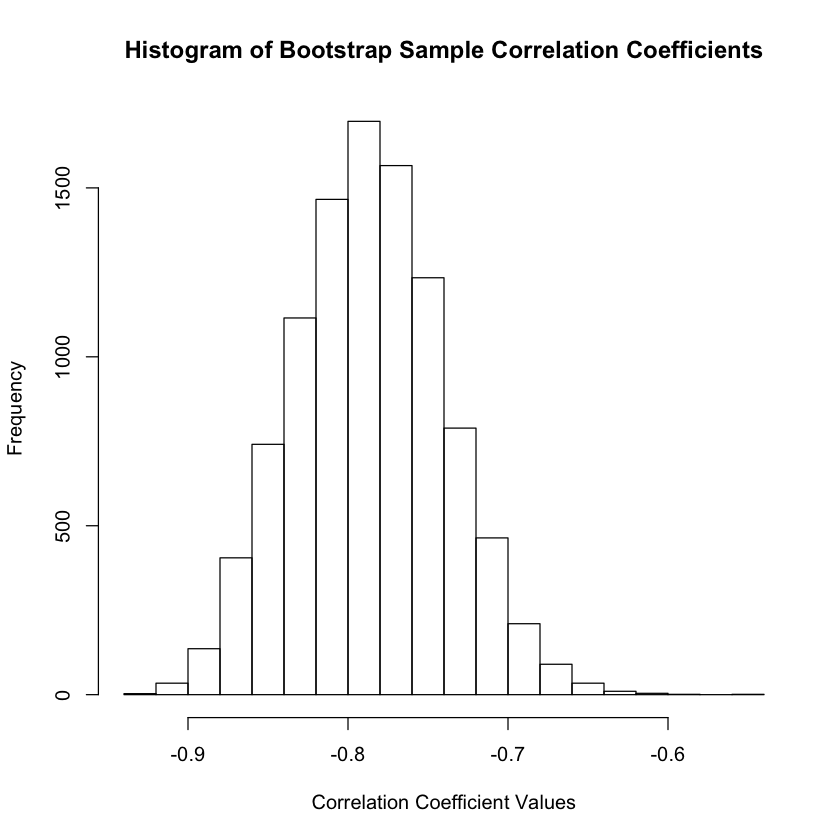

In [12]:
my.hist = hist(corr_vals, breaks = 20, 
          main = "Histogram of Bootstrap Sample Correlation Coefficients",
          xlab = "Correlation Coefficient Values");

#### Concluding Remarks

Understanding sampling distributions is an imperative and fundamental part of understanding more advanced techniques in statistics.  Bootstrapping and sampling distributions underly some of the most advanced machine learning methods available to us, they underly the conclusions we make with regard to hypothesis testing and confidence intervals, they are at the very foundation of so much that we do with statistics.

So much of the information out their is how to do something, I hope that my content will be a blend of how and why.

If you do have questions, please feel free to reach out.